In [1]:
!pip install -q opendatasets

import opendatasets as od
import pandas as pd

od.download("https://www.kaggle.com/datasets/hummaamqaasim/jobs-in-data/download?datasetVersionNumber=6")



Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: danieldarbekov
Your Kaggle Key: ··········


100%|██████████| 76.1k/76.1k [00:00<00:00, 20.9MB/s]

In [2]:
dt = pd.read_csv("/content/jobs-in-data/jobs_in_data.csv")
dt.head(5)

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [4]:
dt.describe()

,work_year,salary,salary_in_usd
count,9355.000000,9355.000000,9355.000000
mean,2022.760449,149927.981293,150299.495564
std,0.519470,63608.835387,63177.372024
min,2020.000000,14000.000000,15000.000000
25%,2023.000000,105200.000000,105700.000000
50%,2023.000000,143860.000000,143000.000000
75%,2023.000000,187000.000000,186723.000000
max,2023.000000,450000.000000,450000.000000


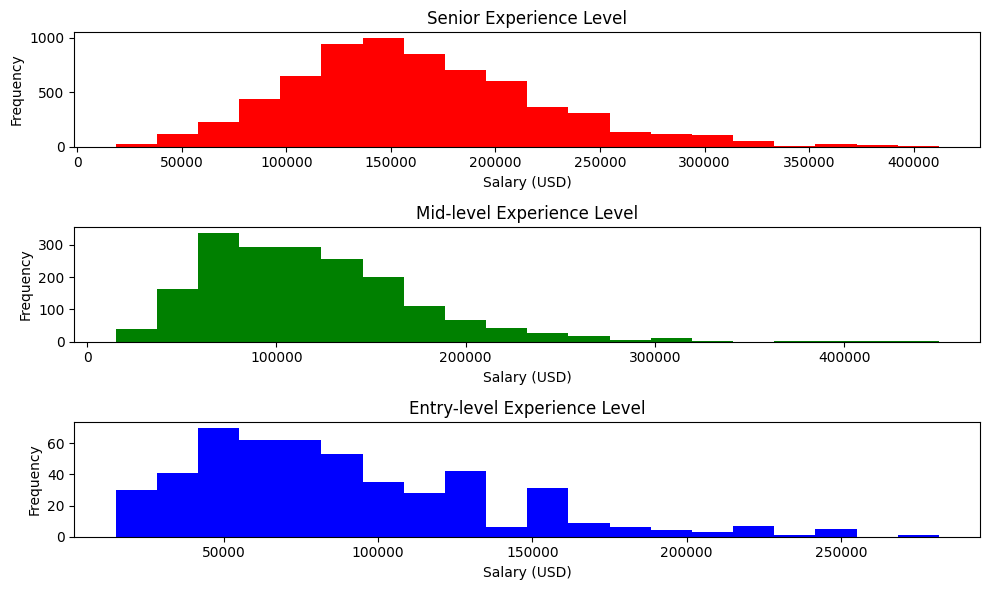

In [5]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))

# Senior
plt.subplot(3, 1, 1)
plt.hist(dt[dt.experience_level == "Senior"].salary_in_usd, color='red', bins=20)
plt.title('Senior Experience Level')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')

# Mid-level
plt.subplot(3, 1, 2)
plt.hist(dt[dt.experience_level == "Mid-level"].salary_in_usd, color='green', bins=20)
plt.title('Mid-level Experience Level')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')

# Entry-level
plt.subplot(3, 1, 3)
plt.hist(dt[dt.experience_level == "Entry-level"].salary_in_usd, color='blue', bins=20)
plt.title('Entry-level Experience Level')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

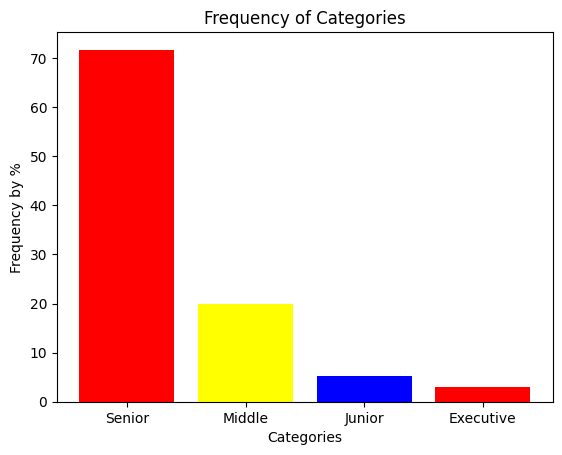

In [6]:


frequency = dt['experience_level'].value_counts()

work_experience = ["Senior","Middle","Junior", "Executive"]


plt.bar(work_experience, frequency/len(dt)*100, color=['red', "yellow", "blue"])
plt.xlabel('Categories')
plt.ylabel('Frequency by %')
plt.title('Frequency of Categories')
plt.show()

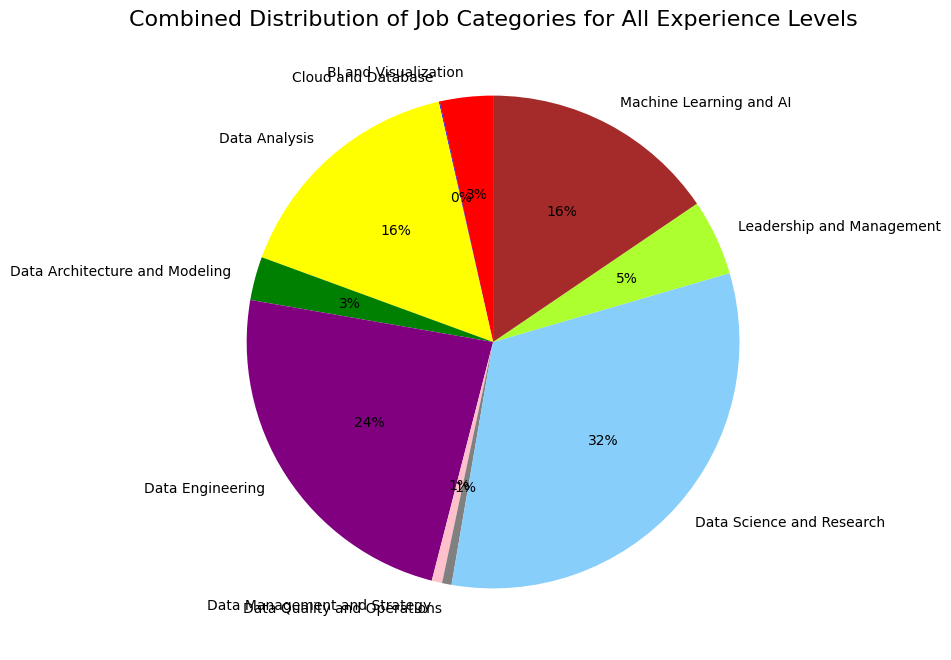

In [7]:
import matplotlib.pyplot as plt

# Assuming 'work_year' is a column in your DataFrame dt
filtered_dt = dt[(dt.experience_level.isin(["Senior", "Mid-level", "Entry-level"])) & (dt.work_year.isin([2022, 2023]))]

# Group by job category and sum occurrences across all experience levels
combined_data = filtered_dt.groupby('job_category').size()

plt.figure(figsize=(12, 8))

# Plot the combined pie chart
plt.pie(combined_data, labels=combined_data.index,
        colors=["red", "blue", "yellow", "green", "purple", "pink", "gray", "lightskyblue", "greenyellow", "brown"],
        autopct='%.0f%%', startangle=90)
plt.title('Combined Distribution of Job Categories for All Experience Levels', fontsize=16)
plt.show()


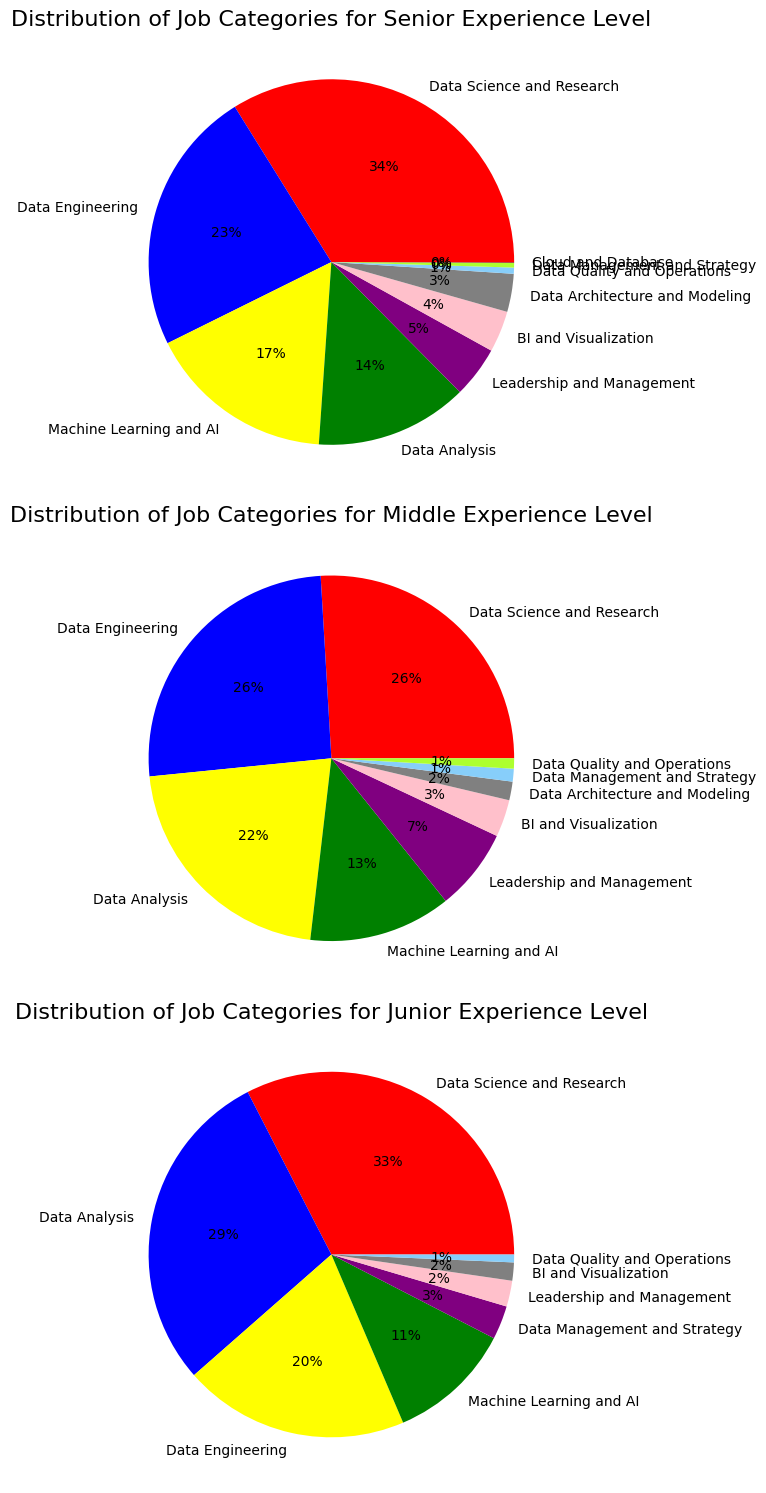

In [8]:
import matplotlib.pyplot as plt

filtered_dt = dt[(dt.experience_level.isin(["Senior", "Mid-level", "Entry-level"])) & (dt.work_year.isin([2022, 2023]))]

senior_dist = filtered_dt[filtered_dt.experience_level == "Senior"].job_category.value_counts()
mid_dist = filtered_dt[filtered_dt.experience_level == "Mid-level"].job_category.value_counts()
junior_dist = filtered_dt[filtered_dt.experience_level == "Entry-level"].job_category.value_counts()
executive_dist = filtered_dt[filtered_dt.experience_level == "Executive"].job_category.value_counts()


plt.figure(figsize=(50, 20))

# Senior
plt.subplot(4, 1, 1)
plt.pie(senior_dist, labels=senior_dist.index, colors=["red", "blue", "yellow", "green", "purple", "pink", "gray", "lightskyblue", "greenyellow", "brown"], autopct='%.0f%%', textprops={'fontsize': 10}, labeldistance=1.1)
plt.title('Distribution of Job Categories for Senior Experience Level', fontsize=16)


# Middle
plt.subplot(4, 1, 2)
plt.pie(mid_dist, labels=mid_dist.index, colors=["red", "blue", "yellow", "green", "purple", "pink", "gray", "lightskyblue", "greenyellow", "brown"], autopct='%.0f%%', textprops={'fontsize': 10})
plt.title('Distribution of Job Categories for Middle Experience Level', fontsize=16)


# Junior
plt.subplot(4, 1, 3)
plt.pie(junior_dist, labels=junior_dist.index, colors=["red", "blue", "yellow", "green", "purple", "pink", "gray", "lightskyblue", "greenyellow", "brown"], autopct='%.0f%%')
plt.title('Distribution of Job Categories for Junior Experience Level', fontsize=16)



plt.tight_layout()
plt.show()


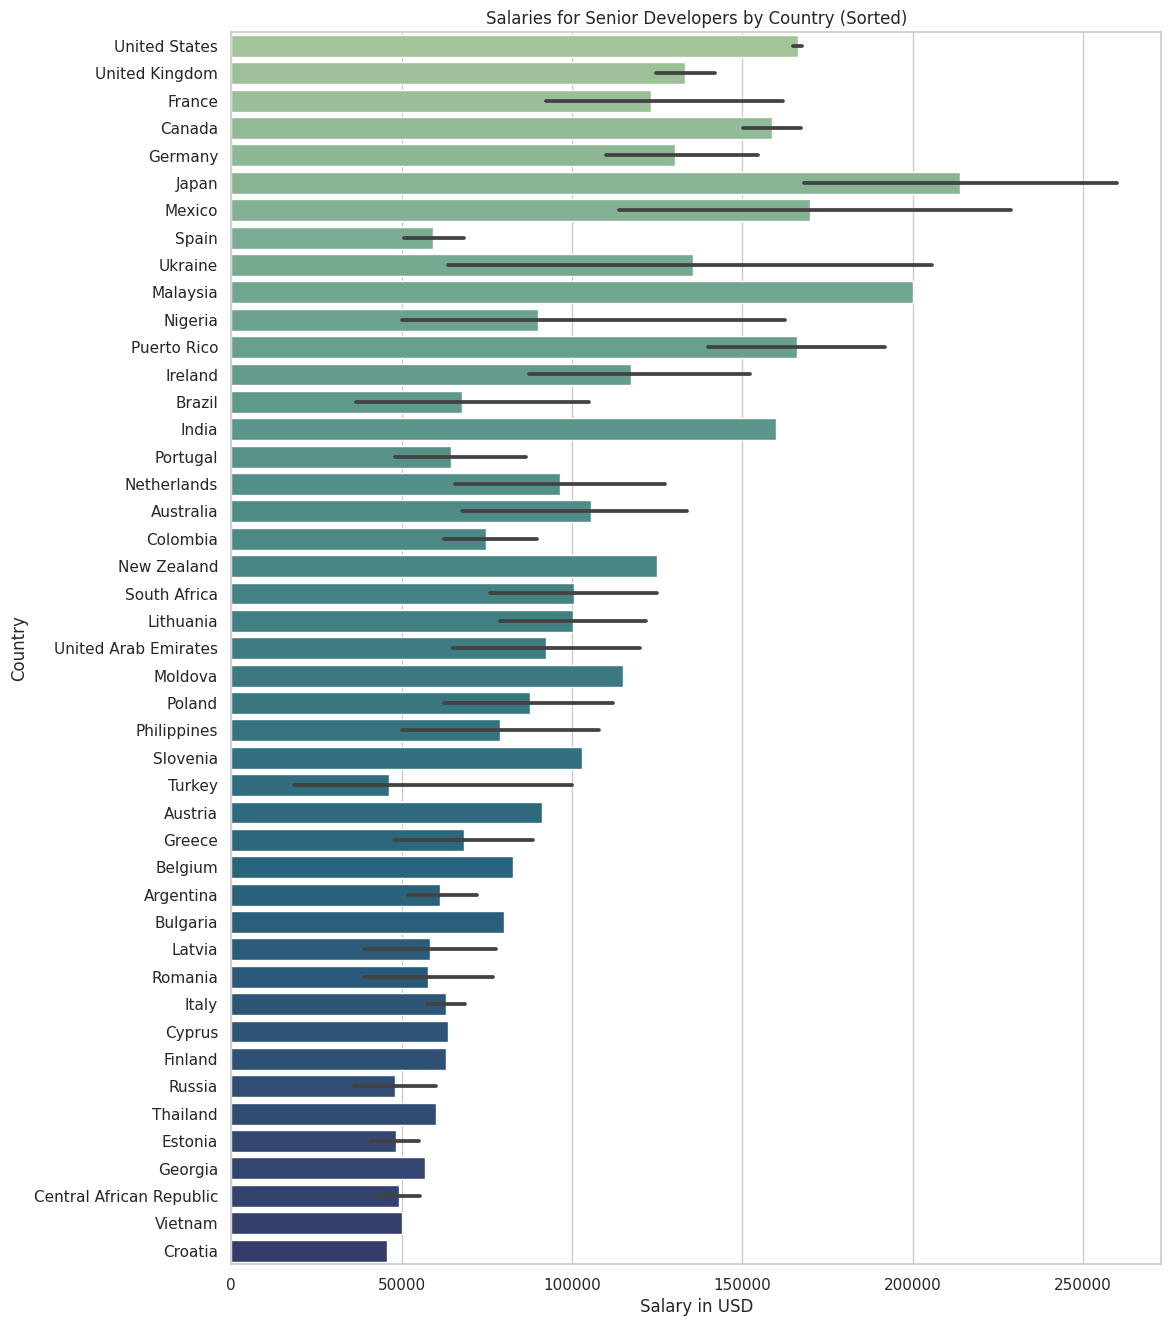

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(12, 16))

sorted_data = dt[dt.experience_level == 'Senior'].copy()
sorted_data['salary_in_usd'] = pd.to_numeric(sorted_data['salary_in_usd'], errors='coerce')
sorted_data = sorted_data.dropna(subset=['salary_in_usd']).sort_values(by='salary_in_usd', ascending=False)


sns.barplot(x='salary_in_usd', y='employee_residence', data=sorted_data, palette='crest', orient='h')
plt.xlabel('Salary in USD')
plt.ylabel('Country')
plt.title('Salaries for Senior Developers by Country (Sorted)')
plt.show()


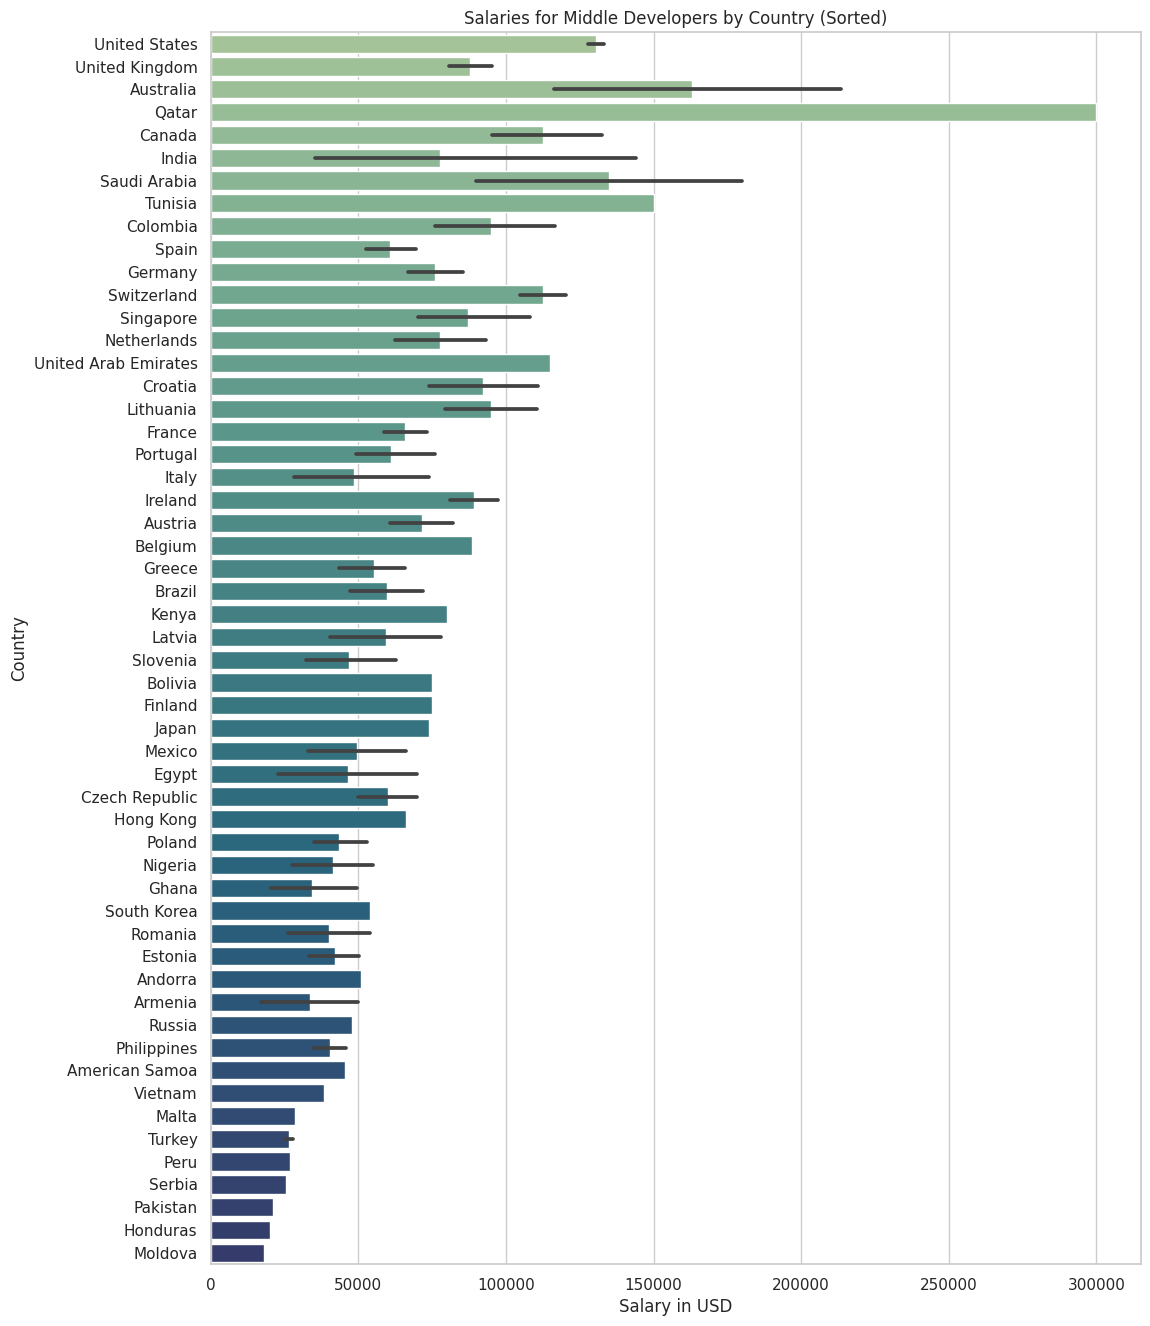

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(12, 16))

sorted_data = dt[dt.experience_level == 'Mid-level'].copy()
sorted_data['salary_in_usd'] = pd.to_numeric(sorted_data['salary_in_usd'], errors='coerce')
sorted_data = sorted_data.dropna(subset=['salary_in_usd']).sort_values(by='salary_in_usd', ascending=False)


sns.barplot(x='salary_in_usd', y='employee_residence', data=sorted_data, palette='crest', orient='h')
plt.xlabel('Salary in USD')
plt.ylabel('Country')
plt.title('Salaries for Middle Developers by Country (Sorted)')
plt.show()


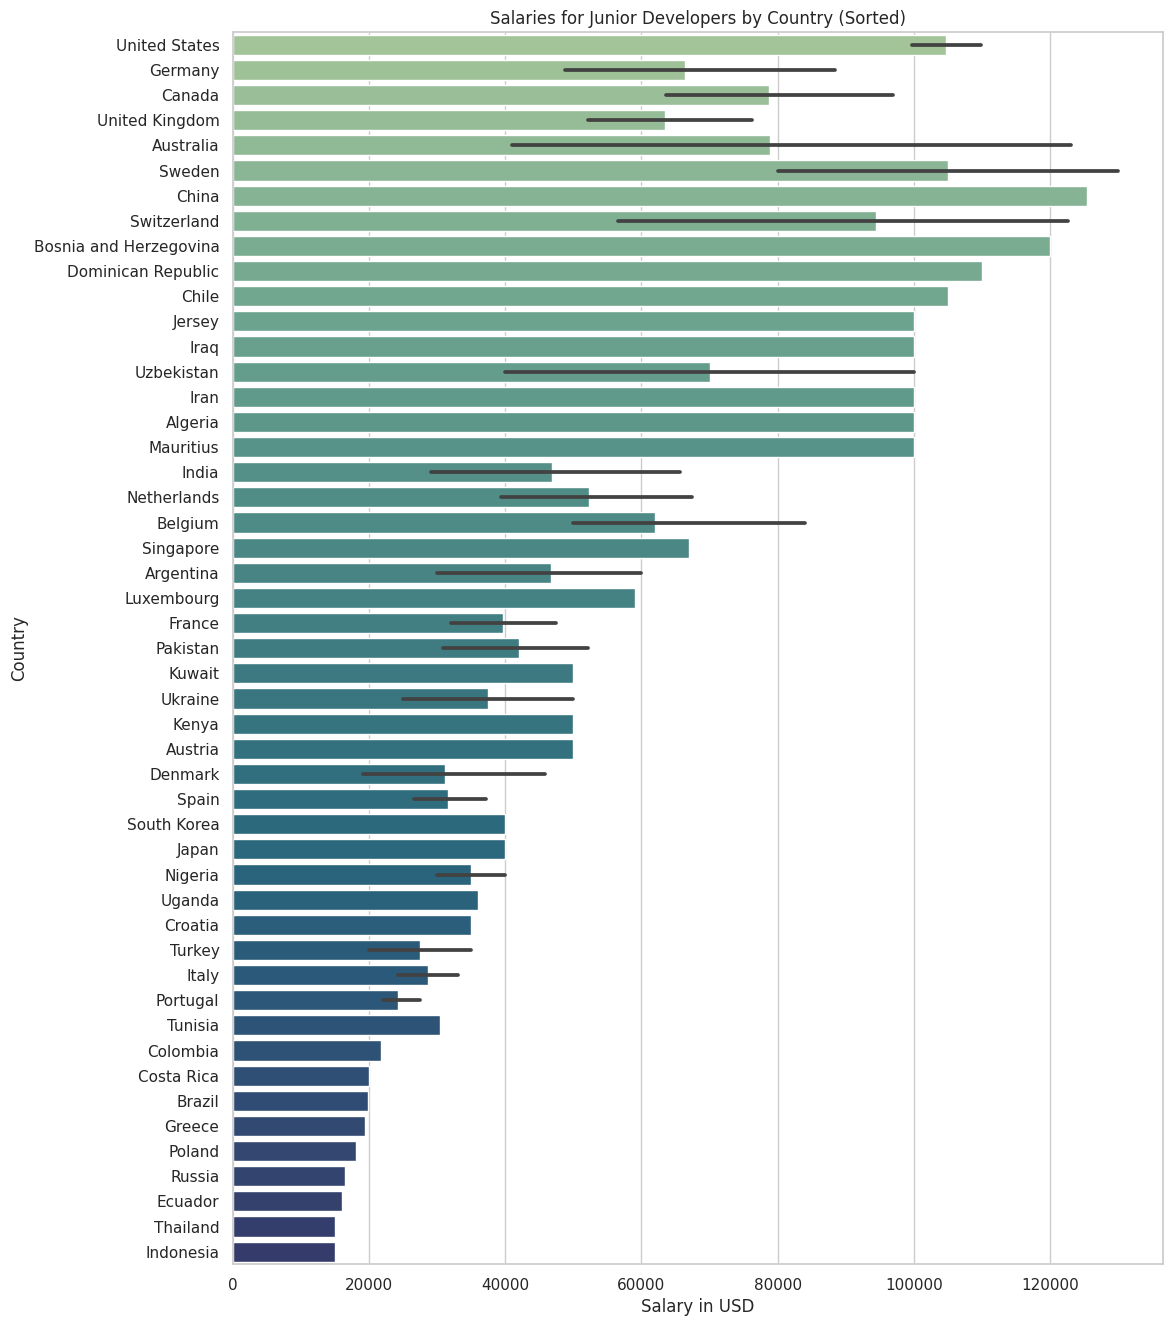

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(12, 16))

# Filter and sort the DataFrame
sorted_data = dt[dt.experience_level == 'Entry-level'].copy()  # Create a copy to avoid the warning
sorted_data['salary_in_usd'] = pd.to_numeric(sorted_data['salary_in_usd'], errors='coerce')
sorted_data = sorted_data.dropna(subset=['salary_in_usd']).sort_values(by='salary_in_usd', ascending=False)


sns.barplot(x='salary_in_usd', y='employee_residence', data=sorted_data, palette='crest', orient='h')
plt.xlabel('Salary in USD')
plt.ylabel('Country')
plt.title('Salaries for Junior Developers by Country (Sorted)')
plt.show()


In [12]:
setting = dt.work_setting.unique()
employment = dt.employment_type.unique()

print(dt.employment_type.value_counts(), "\n\n\n\n")
print(dt.work_setting.value_counts())

Full-time    9310
Contract       19
Part-time      15
Freelance      11
Name: employment_type, dtype: int64 




In-person    5730
Remote       3434
Hybrid        191
Name: work_setting, dtype: int64


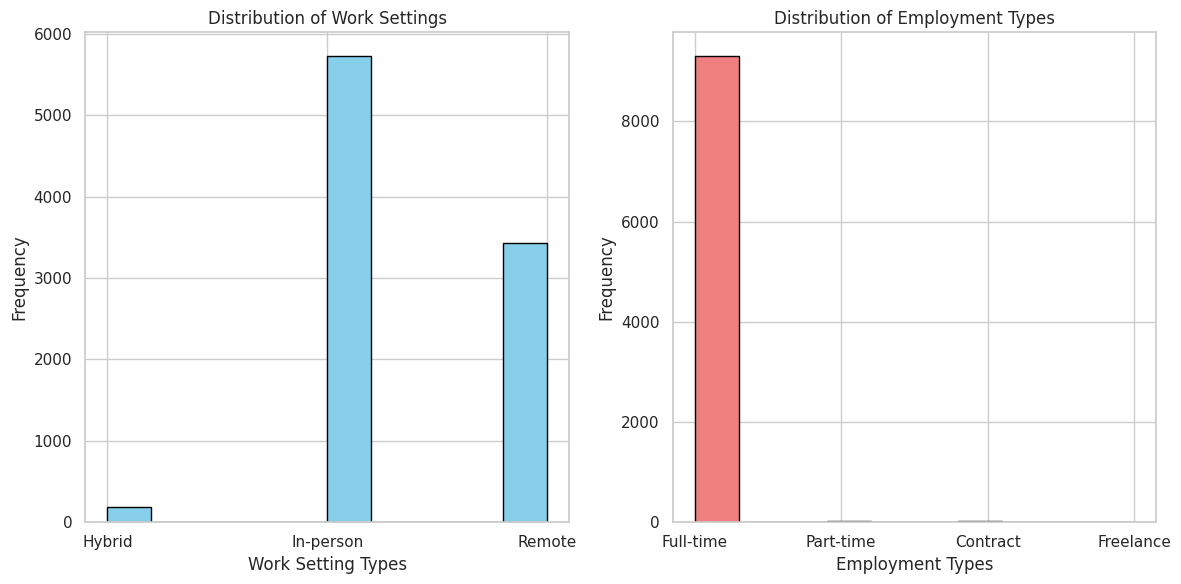

In [13]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(dt.work_setting, edgecolor='black', color='skyblue')
plt.xlabel('Work Setting Types')
plt.ylabel('Frequency')
plt.title('Distribution of Work Settings')


plt.subplot(1, 2, 2)
plt.hist(dt.employment_type, edgecolor='black', color='lightcoral')
plt.xlabel('Employment Types')
plt.ylabel('Frequency')
plt.title('Distribution of Employment Types')

plt.tight_layout()
plt.show()

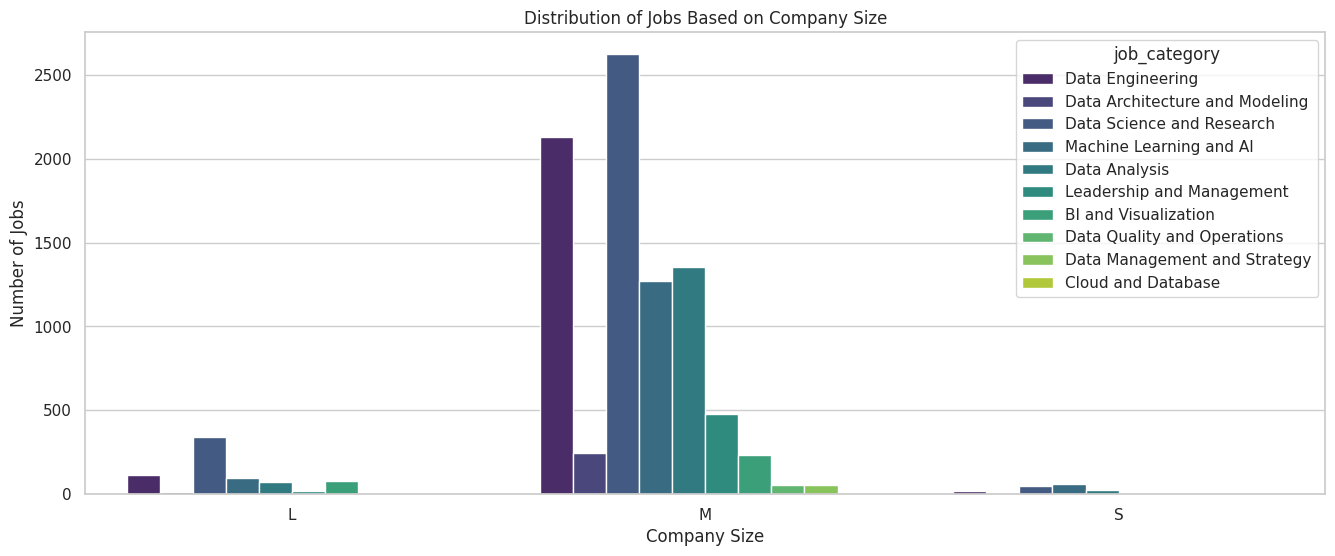

In [14]:
plt.figure(figsize=(16, 6))


sns.countplot(x='company_size', hue='job_category', data=dt, palette='viridis')

plt.xlabel('Company Size')
plt.ylabel('Number of Jobs')
plt.title('Distribution of Jobs Based on Company Size')
plt.show()


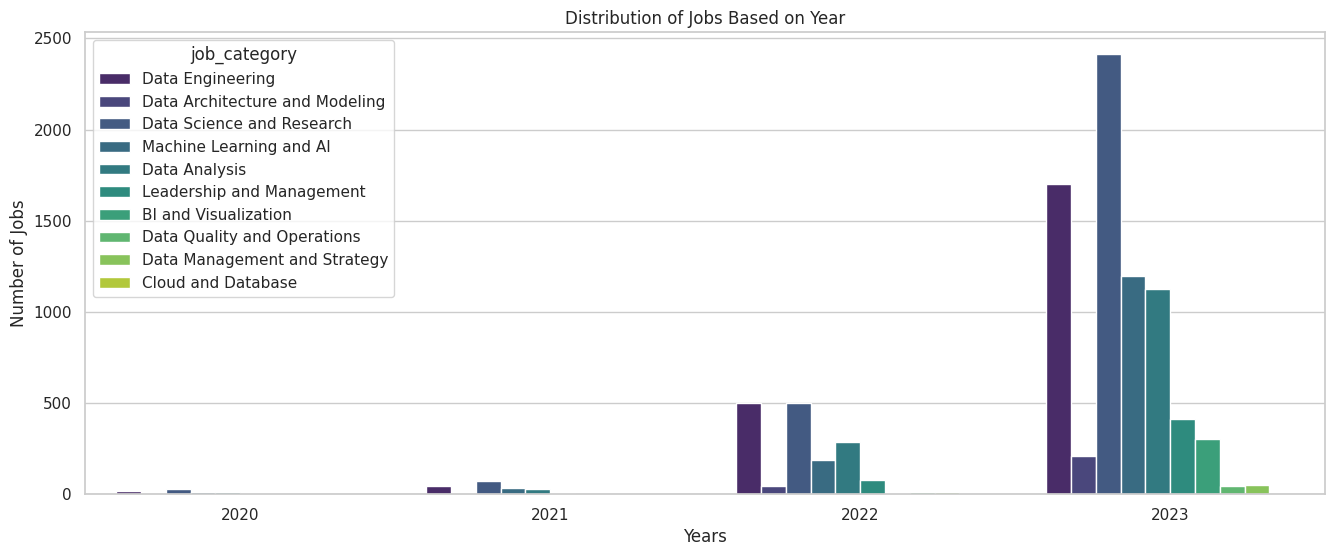

In [15]:
plt.figure(figsize=(16, 6))


sns.countplot(x='work_year', hue='job_category', data=dt, palette='viridis')

plt.xlabel('Years')
plt.ylabel('Number of Jobs')
plt.title('Distribution of Jobs Based on Year')
plt.show()



In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

df = dt[dt['experience_level'] == 'Senior']

X = pd.get_dummies(df[["job_title", "job_category", "employee_residence", "experience_level", "company_size"]])
y = df.salary_in_usd

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [26]:
from sklearn.metrics import mean_squared_error
import numpy as np
model = DecisionTreeRegressor().fit(X_train, y_train)


y_pred = model.predict(X_test)

loss = mean_squared_error(y_test, y_pred)

print("MSE: ", loss)

MSE:  2617538706.155635
